In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

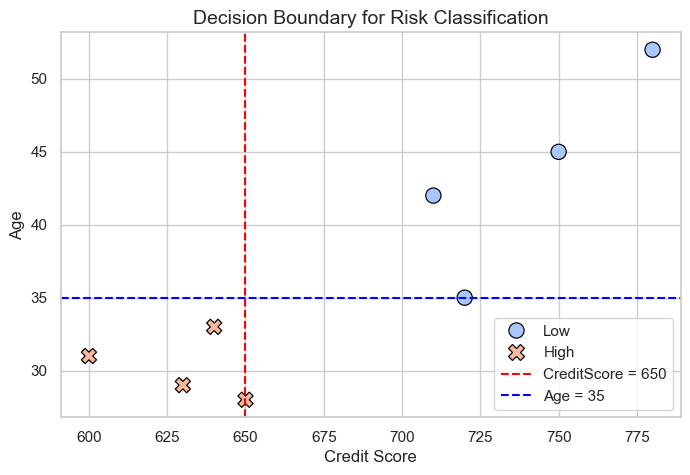

In [9]:
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8],
    "Age": [35, 28, 45, 31, 52, 29, 42, 33],
    "CreditScore": [720, 650, 750, 600, 780, 630, 710, 640],
    "Education": [16, 14, np.nan, 12, 18, 14, 16, 12],
    "RiskLevel": ["Low", "High", "?", "High", "Low", "High", "Low", "High"]
}

df = pd.DataFrame(data)

# Define risk classification function
def classify_risk(age, credit_score):
    if age > 35 and credit_score > 700:
        return "Low"
    elif age <= 35 and credit_score <= 650:
        return "High"
    return "Uncertain"

# Assign risk level to T2
df.loc[df["RiskLevel"] == "?", "RiskLevel"] = classify_risk(df.loc[df["ID"] == 3, "Age"].values[0], 
                                                             df.loc[df["ID"] == 3, "CreditScore"].values[0])

# Impute missing Education values using KNN
imputer = KNNImputer(n_neighbors=3)
df["Education"] = imputer.fit_transform(df[["Education"]])

# Scatter plot: Decision boundary
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="RiskLevel", style="RiskLevel", s=120, palette="coolwarm", edgecolor="black")
plt.axvline(x=650, color="red", linestyle="--", label="CreditScore = 650")
plt.axhline(y=35, color="blue", linestyle="--", label="Age = 35")
plt.title("Decision Boundary for Risk Classification", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend()
plt.show()


In [10]:
# Display final dataset
print("Updated Dataset After Imputation:")
print(df)

Updated Dataset After Imputation:
   ID  Age  CreditScore  Education RiskLevel
0   1   35          720  16.000000       Low
1   2   28          650  14.000000      High
2   3   45          750  14.571429       Low
3   4   31          600  12.000000      High
4   5   52          780  18.000000       Low
5   6   29          630  14.000000      High
6   7   42          710  16.000000       Low
7   8   33          640  12.000000      High
